In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading and preparing our data

In [2]:
iris = pd.read_csv('./Downloads/iris.csv', sep=',')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
128,6.4,2.8,5.6,2.1,virginica
116,6.5,3.0,5.5,1.8,virginica
18,5.7,3.8,1.7,0.3,setosa
137,6.4,3.1,5.5,1.8,virginica
5,5.4,3.9,1.7,0.4,setosa


In [3]:
# Target variable
y = 1*(iris.species == 'virginica') + 2*(iris.species == 'versicolor')

#### Training our k-NN model

In [4]:
# 1 closest neighbor
k = 1

In [5]:
# Features for our model
X = iris[['sepal_length', 'petal_length']]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier(n_neighbors=k)
m.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Let's predict the species on a 100x100 grid along with a plot on it with the different predictions in different colors.

Both the original data points and the decision boundary are marked.

Text(0, 0.5, 'Petal length (cm)')

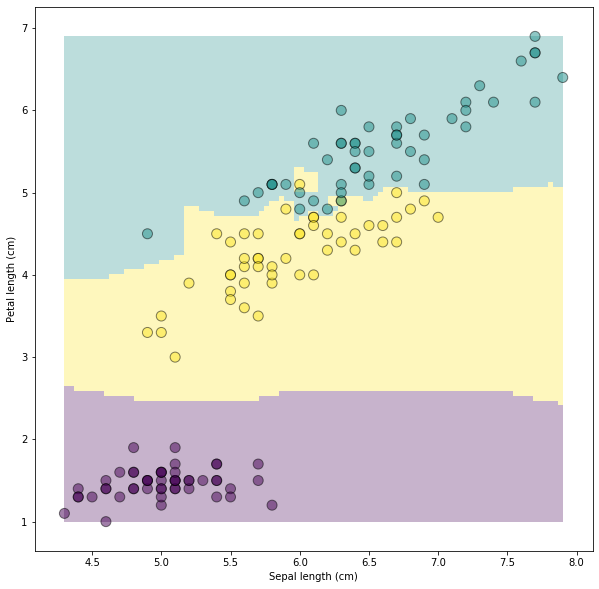

In [22]:
# Code provided by the lab specs, with slight modifications

## Predict: take this code as black box
range1 = np.linspace(start=X.min()[0], stop=X.max()[0], num=100)
range2 = np.linspace(X.min()[1], X.max()[1], 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(10,10))
## plot the predicted values on grid as an image
plt.imshow(yhat.reshape((100,100)),
alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
origin='lower', aspect='auto')
## add the actual values
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, alpha=0.5, edgecolor="k")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')

We can see that flowers with a petal length less than 2 cm are all in the same _purple_ category. Besides, in most cases, when the petal length is less than about 4.75cm (from the visualization above), the flowers are in the same _yellow_ category. Above that threshold, they are mostly in the _green_ category.

We can see that there are a few outliers in this categorization process. The different pattern of colors shows that the modle tried to adapt to them. For example, there is a small yellow region on sepal length at 6cm and petal length at a bit more than 5 cm that captures the yellow point in the green region. This indicates **overfitting**.

#### Different k features

In [30]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [37]:
# Using the other 2 columns
X = X = iris[['sepal_width', 'petal_width']]
# Same 'k'
k = 1

In [38]:
m = KNeighborsClassifier(n_neighbors=k)
m.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Text(0, 0.5, 'Petal width (cm)')

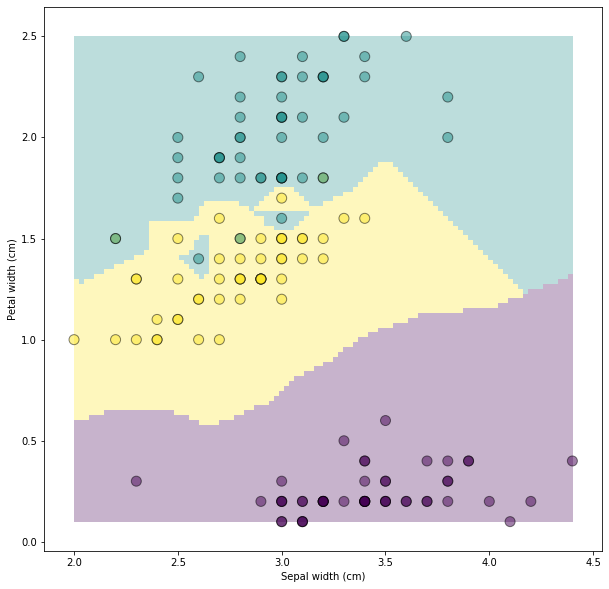

In [40]:
# Code provided by the lab specs, with slight modifications

## Predict: take this code as black box
range1 = np.linspace(start=X.min()[0], stop=X.max()[0], num=100)
range2 = np.linspace(X.min()[1], X.max()[1], 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(10,10))
## plot the predicted values on grid as an image
plt.imshow(yhat.reshape((100,100)),
alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
origin='lower', aspect='auto')
## add the actual values
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, alpha=0.5, edgecolor="k")
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

Choosing the two other variables, sepal width and petal width, did not prove to be effective, even with the same number of neighbors _k == 1_. We can see a lot of **overfitting** above and the plot does not help us much.

Let's go back to the initial two variables, but increase our number of neighbors to 3.

In [41]:
k = 3
X = iris[['sepal_length', 'petal_length']]

m = KNeighborsClassifier(n_neighbors=k)
m.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Text(0, 0.5, 'Petal width (cm)')

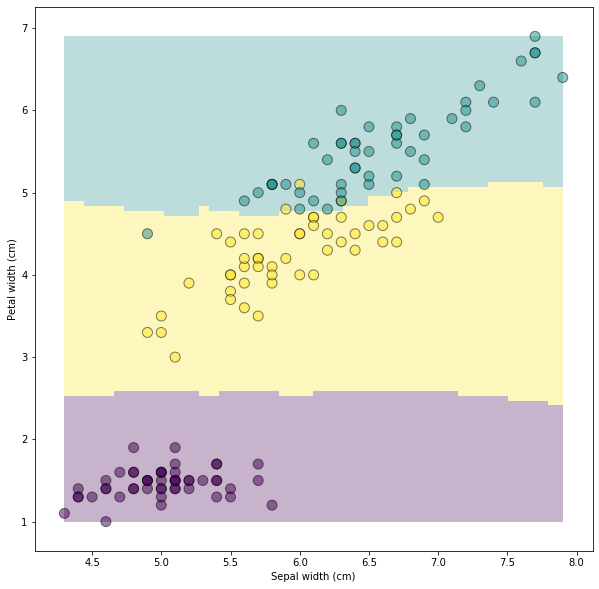

In [42]:
# Code provided by the lab specs, with slight modifications

## Predict: take this code as black box
range1 = np.linspace(start=X.min()[0], stop=X.max()[0], num=100)
range2 = np.linspace(X.min()[1], X.max()[1], 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(10,10))
## plot the predicted values on grid as an image
plt.imshow(yhat.reshape((100,100)),
alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
origin='lower', aspect='auto')
## add the actual values
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, alpha=0.5, edgecolor="k")
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

By increasing the number of neighbors we can see a **reduction if overfitting**, as the shaded areas are more uniform, that is, there are no "small" yellow regions in an area that is majority green. We can see, as well, some yellow points in the green region and some green poits in the yellow region, which also indicates this decrease in overfitting.

Besides, I do not believe there was underfitting as we can see a clean, very nice distribution of the points in our plot!